<a href="https://colab.research.google.com/github/silvesttrnovikov-crypto/Homework_/blob/main/untitl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нomework_1

In [1]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2025-10-13 10:13:03--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-10-13 10:13:03 (4.93 MB/s) - ‘train.csv’ saved [60302/60302]



In [2]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1efUeYyQWo9A_rZWk49RUDOX3FIwUnG0_WcQI7YXr-hI/edit#gid=0


In [3]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1pZaZC8cX5bFUM6Ac14rErB2glVI0cR116Xjv3a_2ncM/edit#gid=0


In [4]:
import pandas as pd

In [33]:
df = pd.read_excel('InteractiveSheet_2025-10-13_10_14_51.xlsx', sheet_name='Лист1')
survival = df.groupby('Pclass')['Survived'].mean()
print(survival)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


2

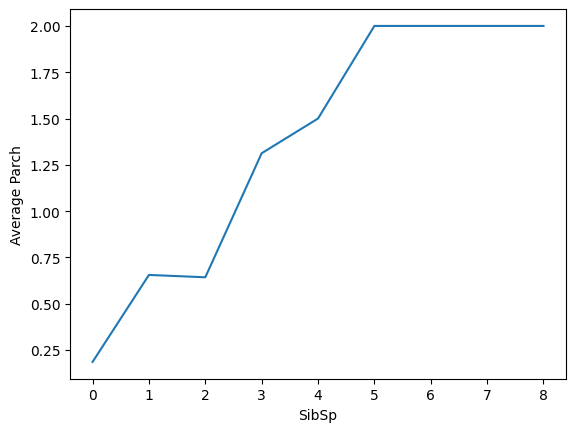

In [16]:
data.groupby('SibSp')['Parch'].mean().plot()
plt.xlabel('SibSp')
plt.ylabel('Average Parch')
plt.show()

3

In [34]:
#Чтобы улучшть точность нужно увеличить число ближаших соседей и число признаков
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Pclass", "Sex", "Age"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Age'] = features['Age'].fillna(features['Age'].median())
    return features

model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.85


4

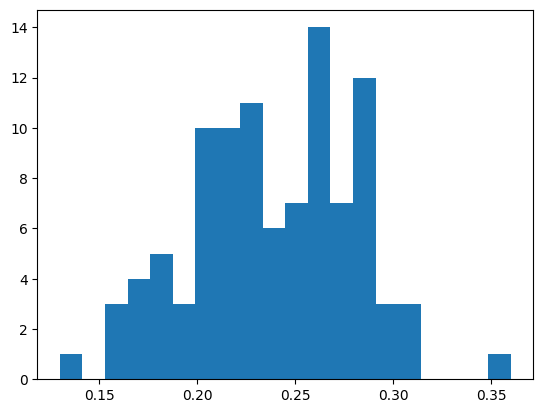

In [36]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Fare", "Pclass", "Sex", "Age"]].copy()
    features["Fare"] /= features["Fare"].mean()
    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Age'] = features['Age'].fillna(features['Age'].median())
    return features

model = KNeighborsClassifier(n_neighbors=5)

data = pd.read_csv("train.csv", index_col='PassengerId')

test_scores = []

for i in range(100):
    data_train, data_test = train_test_split(data, test_size=100, random_state=i)#не заметил эту функцию в тексте задания - долго не мог понять как сделать этот этап

    model.fit(
        feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)),
        data_train['Survived']
    )

    test_predictions = model.predict(
        feature_selection_and_preprocessing(data_test.drop('Survived', axis=1))
    )

    accuracy = accuracy_score(data_test['Survived'], test_predictions)
    test_scores.append(accuracy)

test_errors = [1 - score for score in test_scores]

plt.hist(test_errors, bins=20)
plt.show()

#Homework_2

In [31]:
import numpy as np
import matplotlib.pyplot as plt

1

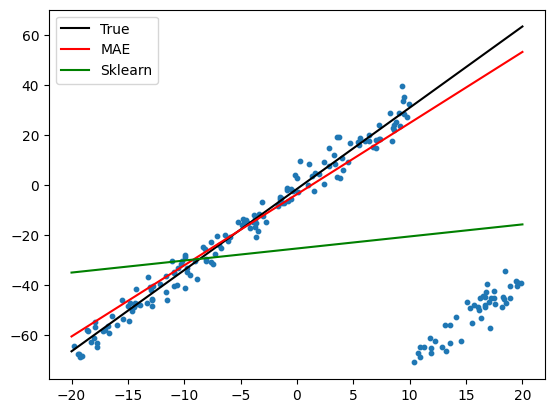

In [63]:
from sklearn.linear_model import LinearRegression

np.random.seed(50)
x = np.random.uniform(-20, 20, 200)
y = 3.25 * x - 1.47 + np.random.normal(size=200) * 4
y[x > 10] += -100  # выбросы

w = np.random.randn(2)
for i in range(1000):
    y_pred = w[0] + w[1] * x
    w[0] -= 0.01 * -np.mean(np.sign(y - y_pred))
    w[1] -= 0.01 * -np.mean(np.sign(y - y_pred) * x)

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

plt.scatter(x, y, s=10)
x_plot = np.linspace(-20, 20, 200)
plt.plot(x_plot, 3.25*x_plot - 1.47, 'k', label='True')
plt.plot(x_plot, w[0] + w[1]*x_plot, 'r', label='MAE')
plt.plot(x_plot, lr.predict(x_plot.reshape(-1, 1)), 'g', label='Sklearn')
plt.legend()
plt.show()
# очевидно MAE менее чувствительна к выбросам и как следствие дает лучшее приближение

2

In [82]:
?


#Homework_3

In [83]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2025-10-13 11:46:41--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-10-13 11:46:41 (5.09 MB/s) - ‘train.csv.1’ saved [60302/60302]



In [84]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]].copy()
    features["Fare"] = features["Fare"].fillna(features["Fare"].median())
    features["Age"] = features["Age"].fillna(features["Age"].median())
    features["Embarked"] = features["Embarked"].fillna("S")
    features["FamilySize"] = features["SibSp"] + features["Parch"] + 1
    features["FarePerPerson"] = features["Fare"] / features["FamilySize"]
    features["Age*Class"] = features["Age"] * features["Pclass"]
    features["IsAlone"] = (features["FamilySize"] == 1).astype(int)
    return features

model = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(), ["Sex", "Embarked"]),
        remainder=StandardScaler()
    ),
    LogisticRegression(C=0.1, max_iter=1000)
)

# Validation code
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)),
    data_train['Survived']
)

train_predictions = model.predict(feature_selection_and_preprocessing(data_train.drop('Survived', axis=1)))
test_predictions = model.predict(feature_selection_and_preprocessing(data_test.drop('Survived', axis=1)))

print("Train accuracy:", accuracy_score(data_train['Survived'], train_predictions))
print("Test accuracy:", accuracy_score(data_test['Survived'], test_predictions))

Train accuracy: 0.7988422575976846
Test accuracy: 0.81


#Homework_4

1